In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
import numpy.linalg as la
import csv
import pandas as pd

In [50]:
df = pd.read_csv("x.csv")

In [3]:
df['Sex'] = df['Sex'].replace('M',1)

In [4]:
for row in df:
    if row == 'date of op' or row == 'survival' or row == 'GX VO2 Max VO2/Pred (%)' or row == 'GX Predicted VO2/HR (mL/beat)' or row == 'GX Predicted Work (Watts)' or row == 'name of op' or row == 'pred mort' or row == 'date of discharge' or row == 'LOSbin' or row == 'date of death/Today' or row == 'alive/dead' or row == 'survival' or row == '30/7mort' or row == '1 year mort ' or row == '2 year mort':
        df = df.drop(row,axis = 1, inplace= False)

In [5]:
df

,Patient,Age,Sex,TPA,BMI,GX AT VO2 (mL/kg/min),GX AT VE/VCO2,GX VO2 Max VO2 (mL/kg/min),GX VO2 Max VO2/HR (mL/beat),GX Work Max Work (Watts),PF Pre FEV1/FVC (%),PF Pre FEV1 (L),Side,LOS
0,21,66,1,NaN,26,7.4,39,9.8,8,30,57,1.56,NaN,1
1,179,68,1,1460.3,24,15.3,29,24.8,17,111,80,2.97,L,13


In [6]:
db = pd.read_csv("model_data.csv")

In [7]:
db

,Patient,Age,Sex,TPA,BMI,GX AT VO2 (mL/kg/min),GX AT VE/VCO2,GX VO2 Max VO2 (mL/kg/min),GX VO2 Max VO2/Pred (%),GX VO2 Max VO2/HR (mL/beat),...,date of op,date of discharge,LOS,LOSbin,date of death/Today,alive / dead,survival,30/7mort,1 year mort,2 year mort
0,1,88,M,1556.8,24,10.2,35,12.5,70,8,...,2016/9/27 00:00,2016/9/29 00:00,2,0,2016/9/29 00:00,1,0.066667,1,1,1
1,2,84,M,NaN,20,9.0,30,15.4,62,6,...,2020/10/23 00:00,2020/10/29 00:00,6,0,2020/10/29 00:00,1,0.200000,1,1,1
2,3,83,M,1800.2,23,8.8,39,15.4,68,10,...,2017/7/28 00:00,2017/8/15 00:00,18,1,2017/8/15 00:00,1,0.600000,1,1,1
3,4,88,M,NaN,29,10.5,38,14.0,85,11,...,2020/3/19 00:00,2020/4/1 00:00,13,1,2020/4/17 00:00,1,0.966667,1,1,1
4,5,86,F,NaN,25,12.7,38,15.7,93,7,...,2021/3/2 00:00,2021/3/12 00:00,10,1,2021/6/1 00:00,1,3.033333,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,257,72,M,NaN,29,13.8,28,21.5,99,16,...,2014/6/10 00:00,2014/6/14 00:00,4,0,2021/10/1 00:00,0,89.000000,0,0,0
246,258,59,M,NaN,31,11.3,20,27.3,110,15,...,2014/6/5 00:00,2014/6/20 00:00,15,1,2021/10/1 00:00,0,89.166667,0,0,0
247,259,66,M,NaN,32,11.9,24,21.6,98,14,...,2014/5/20 00:00,2014/5/23 00:00,3,0,2021/10/1 00:00,0,89.700000,0,0,0
248,260,79,F,NaN,31,10.5,23,13.9,103,9,...,2014/4/30 00:00,2014/5/7 00:00,7,0,2021/10/1 00:00,0,90.366667,0,0,0


In [8]:
for row in db:
    if row == 'TPA' or row == 'Patient' or row == 'date of op' or row == 'survival' or row == 'GX VO2 Max VO2/Pred (%)' or row == 'GX Predicted VO2/HR (mL/beat)' or row == 'GX Predicted Work (Watts)' or row == 'name of op' or row == 'pred mort' or row == 'date of discharge ' or row == 'LOSbin' or row == 'date of death/Today' or row == 'alive / dead' or row == 'survival' or row == '30/7mort' or row == '1 year mort ' or row == '2 year mort ':
        db = db.drop(row,axis = 1, inplace= False)

In [9]:
db

,Age,Sex,BMI,GX AT VO2 (mL/kg/min),GX AT VE/VCO2,GX VO2 Max VO2 (mL/kg/min),GX VO2 Max VO2/HR (mL/beat),GX Work Max Work (Watts),PF Pre FEV1/FVC (%),PF Pre FEV1 (L),Side,LOS
0,88,M,24,10.2,35,12.5,8,47,69.0,2.06,L,2
1,84,M,20,9.0,30,15.4,6,67,72.0,2.01,L,6
2,83,M,23,8.8,39,15.4,10,60,68.0,2.15,L,18
3,88,M,29,10.5,38,14.0,11,74,77.0,2.45,R,13
4,86,F,25,12.7,38,15.7,7,70,0.0,0.00,L,10
...,...,...,...,...,...,...,...,...,...,...,...,...
245,72,M,29,13.8,28,21.5,16,131,73.0,3.05,L,4
246,59,M,31,11.3,20,27.3,15,186,67.0,2.64,L,15
247,66,M,32,11.9,24,21.6,14,179,76.0,3.42,L,3
248,79,F,31,10.5,23,13.9,9,73,58.0,1.01,L,7


In [10]:
db['Sex'] = db['Sex'].replace('M',1)

In [11]:
db['Sex'] = db['Sex'].replace('F',0)

In [12]:
db

,Age,Sex,BMI,GX AT VO2 (mL/kg/min),GX AT VE/VCO2,GX VO2 Max VO2 (mL/kg/min),GX VO2 Max VO2/HR (mL/beat),GX Work Max Work (Watts),PF Pre FEV1/FVC (%),PF Pre FEV1 (L),Side,LOS
0,88,1,24,10.2,35,12.5,8,47,69.0,2.06,L,2
1,84,1,20,9.0,30,15.4,6,67,72.0,2.01,L,6
2,83,1,23,8.8,39,15.4,10,60,68.0,2.15,L,18
3,88,1,29,10.5,38,14.0,11,74,77.0,2.45,R,13
4,86,0,25,12.7,38,15.7,7,70,0.0,0.00,L,10
...,...,...,...,...,...,...,...,...,...,...,...,...
245,72,1,29,13.8,28,21.5,16,131,73.0,3.05,L,4
246,59,1,31,11.3,20,27.3,15,186,67.0,2.64,L,15
247,66,1,32,11.9,24,21.6,14,179,76.0,3.42,L,3
248,79,0,31,10.5,23,13.9,9,73,58.0,1.01,L,7


In [13]:
db['Side'] = db['Side'].replace('L',0)

In [14]:
db['Side'] = db['Side'].replace('R',1)

In [15]:
db['Side'] = db['Side'].replace('NaN',-1)

In [16]:
db

,Age,Sex,BMI,GX AT VO2 (mL/kg/min),GX AT VE/VCO2,GX VO2 Max VO2 (mL/kg/min),GX VO2 Max VO2/HR (mL/beat),GX Work Max Work (Watts),PF Pre FEV1/FVC (%),PF Pre FEV1 (L),Side,LOS
0,88,1,24,10.2,35,12.5,8,47,69.0,2.06,0.0,2
1,84,1,20,9.0,30,15.4,6,67,72.0,2.01,0.0,6
2,83,1,23,8.8,39,15.4,10,60,68.0,2.15,0.0,18
3,88,1,29,10.5,38,14.0,11,74,77.0,2.45,1.0,13
4,86,0,25,12.7,38,15.7,7,70,0.0,0.00,0.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...
245,72,1,29,13.8,28,21.5,16,131,73.0,3.05,0.0,4
246,59,1,31,11.3,20,27.3,15,186,67.0,2.64,0.0,15
247,66,1,32,11.9,24,21.6,14,179,76.0,3.42,0.0,3
248,79,0,31,10.5,23,13.9,9,73,58.0,1.01,0.0,7


In [17]:
for row in db:
    if row == 'TPA' or row == 'Patient' or row == 'date of op' or row == 'survival' or row == 'GX VO2 Max VO2/Pred (%)' or row == 'GX Predicted VO2/HR (mL/beat)' or row == 'GX Predicted Work (Watts)' or row == 'name of op' or row == 'pred mort' or row == 'date of discharge ' or row == 'LOSbin' or row == 'date of death/Today' or row == 'alive / dead' or row == 'survival' or row == '30/7mort' or row == '1 year mort ' or row == '2 year mort ':
        db = db.drop(row,axis = 1, inplace= False)

In [18]:
db

,Age,Sex,BMI,GX AT VO2 (mL/kg/min),GX AT VE/VCO2,GX VO2 Max VO2 (mL/kg/min),GX VO2 Max VO2/HR (mL/beat),GX Work Max Work (Watts),PF Pre FEV1/FVC (%),PF Pre FEV1 (L),Side,LOS
0,88,1,24,10.2,35,12.5,8,47,69.0,2.06,0.0,2
1,84,1,20,9.0,30,15.4,6,67,72.0,2.01,0.0,6
2,83,1,23,8.8,39,15.4,10,60,68.0,2.15,0.0,18
3,88,1,29,10.5,38,14.0,11,74,77.0,2.45,1.0,13
4,86,0,25,12.7,38,15.7,7,70,0.0,0.00,0.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...
245,72,1,29,13.8,28,21.5,16,131,73.0,3.05,0.0,4
246,59,1,31,11.3,20,27.3,15,186,67.0,2.64,0.0,15
247,66,1,32,11.9,24,21.6,14,179,76.0,3.42,0.0,3
248,79,0,31,10.5,23,13.9,9,73,58.0,1.01,0.0,7


In [19]:
X = np.array(db)

In [20]:
X

array([[88.  ,  1.  , 24.  , ...,  2.06,  0.  ,  2.  ],
       [84.  ,  1.  , 20.  , ...,  2.01,  0.  ,  6.  ],
       [83.  ,  1.  , 23.  , ...,  2.15,  0.  , 18.  ],
       ...,
       [66.  ,  1.  , 32.  , ...,  3.42,  0.  ,  3.  ],
       [79.  ,  0.  , 31.  , ...,  1.01,  0.  ,  7.  ],
       [81.  ,  0.  , 30.  , ...,  1.39,  0.  , 11.  ]])

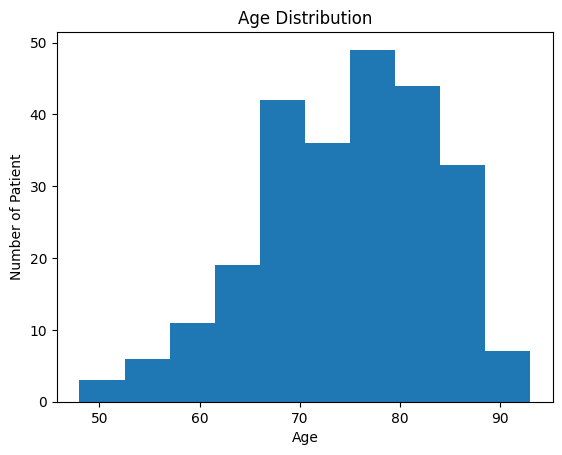

In [21]:
#Age Distribution Display
X_1 = X[:,0]
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Patient")
plt.hist(X_1);

In [22]:
db

,Age,Sex,BMI,GX AT VO2 (mL/kg/min),GX AT VE/VCO2,GX VO2 Max VO2 (mL/kg/min),GX VO2 Max VO2/HR (mL/beat),GX Work Max Work (Watts),PF Pre FEV1/FVC (%),PF Pre FEV1 (L),Side,LOS
0,88,1,24,10.2,35,12.5,8,47,69.0,2.06,0.0,2
1,84,1,20,9.0,30,15.4,6,67,72.0,2.01,0.0,6
2,83,1,23,8.8,39,15.4,10,60,68.0,2.15,0.0,18
3,88,1,29,10.5,38,14.0,11,74,77.0,2.45,1.0,13
4,86,0,25,12.7,38,15.7,7,70,0.0,0.00,0.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...
245,72,1,29,13.8,28,21.5,16,131,73.0,3.05,0.0,4
246,59,1,31,11.3,20,27.3,15,186,67.0,2.64,0.0,15
247,66,1,32,11.9,24,21.6,14,179,76.0,3.42,0.0,3
248,79,0,31,10.5,23,13.9,9,73,58.0,1.01,0.0,7


In [23]:
db = db.dropna(axis = 0)
db

,Age,Sex,BMI,GX AT VO2 (mL/kg/min),GX AT VE/VCO2,GX VO2 Max VO2 (mL/kg/min),GX VO2 Max VO2/HR (mL/beat),GX Work Max Work (Watts),PF Pre FEV1/FVC (%),PF Pre FEV1 (L),Side,LOS
0,88,1,24,10.2,35,12.5,8,47,69.0,2.06,0.0,2
1,84,1,20,9.0,30,15.4,6,67,72.0,2.01,0.0,6
2,83,1,23,8.8,39,15.4,10,60,68.0,2.15,0.0,18
3,88,1,29,10.5,38,14.0,11,74,77.0,2.45,1.0,13
4,86,0,25,12.7,38,15.7,7,70,0.0,0.00,0.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...
245,72,1,29,13.8,28,21.5,16,131,73.0,3.05,0.0,4
246,59,1,31,11.3,20,27.3,15,186,67.0,2.64,0.0,15
247,66,1,32,11.9,24,21.6,14,179,76.0,3.42,0.0,3
248,79,0,31,10.5,23,13.9,9,73,58.0,1.01,0.0,7


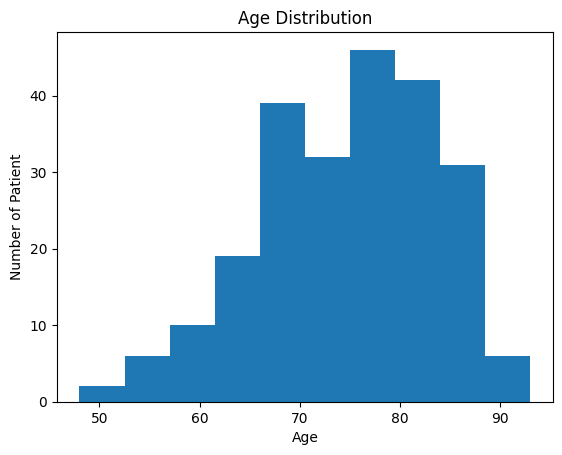

In [24]:
X = np.array(db)
#Age Distribution Display
X_1 = X[:,0]
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Patient")
plt.hist(X_1);

In [25]:
X.shape

(233, 12)

In [26]:
#top 20% of the data
X_2 = X[:50,:11]
y_2 = X[:50,11]


#add 1 to each row cause we need a x = 1 for multivariate x = (1,x1,x2....xn)
#theta = (theta0,theta1,......thetan)
X2 = np.insert(X_2,0,1,axis = 1)
#calculate theta
#normal equation
theta = np.dot(np.dot(X2.T,y_2), la.inv(np.dot(X2.T,X2)))
#get intercept * coef
intercept = theta[0]
coef = theta[1:]

#prediction
x_test = X_2[0].reshape(1,-1)
x_test = np.hstack([np.ones((len(x_test),1)),x_test])
x_test.dot(theta)

array([9.32657703])

In [27]:
x_test = X_2[1].reshape(1,-1)
x_test = np.hstack([np.ones((len(x_test),1)),x_test])
x_test.dot(theta)

array([10.79396738])

In [28]:
x_test = X_2[3].reshape(1,-1)
x_test = np.hstack([np.ones((len(x_test),1)),x_test])
x_test.dot(theta)

array([7.98808933])

In [29]:
pred = []
for i in X_2:
    test_x = i.reshape(1,-1)
    test_x = np.hstack([np.ones((len(test_x),1)),test_x])
    result = test_x.dot(theta)
    pred.append(result)

In [30]:
y_hat = pred

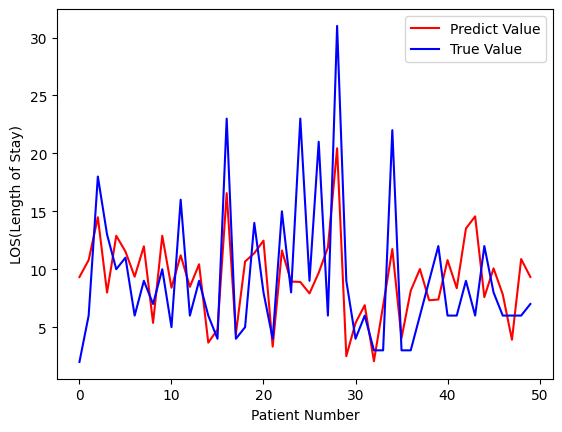

In [31]:
plt.plot(y_hat,'r',label='Predict Value')
plt.plot(y_2,'b',label='True Value');
plt.xlabel("Patient Number")
plt.ylabel("LOS(Length of Stay)")
plt.legend()
plt.show()

In [32]:
c

In [33]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

/Users/beckhol/.local/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


Text(0, 0.5, 'Difference')

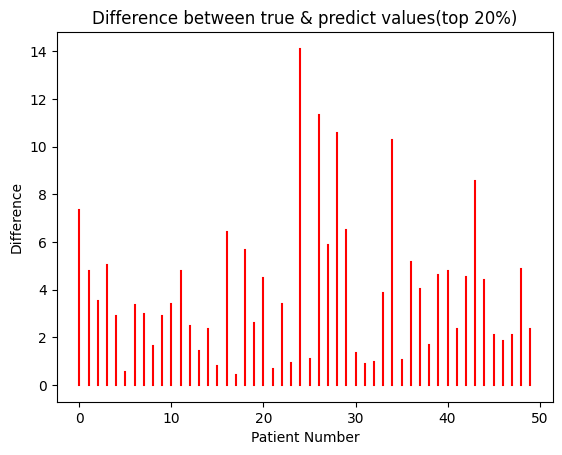

In [34]:
for i in x:
    plt.plot((i,i),(0,np.abs(y_2[i]-y_hat[i])), 'r-')

plt.title("Difference between true & predict values(top 20%)")
plt.xlabel("Patient Number")
plt.ylabel("Difference")

In [35]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X2,y_2)
result = lr.predict(X2)

In [36]:
result = result.reshape(-1)

In [37]:
prediction = np.array(y_hat).reshape(-1)

In [38]:
X.shape

(233, 12)

In [39]:
#bottom 20% of the data
X_3 = X[182:233,:11]
y_3 = X[182:233,11]


#add 1 to each row cause we need a x = 1 for multivariate x = (1,x1,x2....xn)
#theta = (theta0,theta1,......thetan)
X3 = np.insert(X_3,0,1,axis = 1)
#calculate theta
#normal equation
theta = np.dot(np.dot(X3.T,y_3), la.inv(np.dot(X3.T,X3)))
#get intercept * coef
intercept = theta[0]
coef = theta[1:]

#prediction
x_test = X_3[0].reshape(1,-1)
x_test = np.hstack([np.ones((len(x_test),1)),x_test])
x_test.dot(theta)

array([5.76259015])

In [40]:
pred1 = []
for i in X_3:
    test_x = i.reshape(1,-1)
    test_x = np.hstack([np.ones((len(test_x),1)),test_x])
    result = test_x.dot(theta)
    pred1.append(result)

In [41]:
y_hat1 = pred1

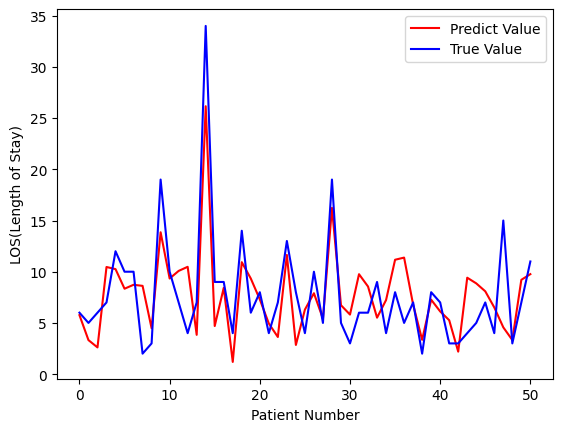

In [42]:
plt.plot(y_hat1,'r',label='Predict Value')
plt.plot(y_3,'b',label='True Value');
plt.xlabel("Patient Number")
plt.ylabel("LOS(Length of Stay)")
plt.legend()
plt.show()

/Users/beckhol/.local/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


Text(0, 0.5, 'Difference')

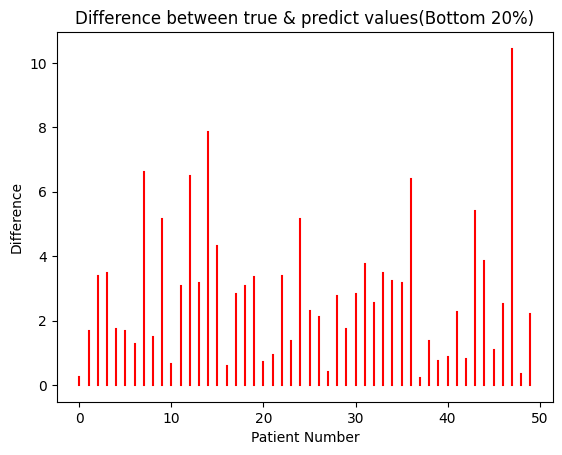

In [43]:
for i in x:
    plt.plot((i,i),(0,np.abs(y_3[i]-y_hat1[i])), 'r-')

plt.title("Difference between true & predict values(Bottom 20%)")
plt.xlabel("Patient Number")
plt.ylabel("Difference")

In [44]:
X2.shape

(50, 12)

In [45]:
y_2.shape

(50,)

In [46]:
theta = np.random.randn(X2.shape[1])
theta


array([ 0.14674327,  0.76485756,  1.07830066,  0.43497156,  0.88130541,
       -0.05295553,  1.43349806,  0.8132929 , -0.76270075, -0.76219598,
       -0.4595198 , -0.71009548])

In [47]:
guess = hyp(theta)
X2

NameError: name 'hyp' is not defined

In [ ]:
y_hat = guess(X2)

In [ ]:
y_hat

In [ ]:
y_2

In [ ]:
def loss_fn(y,y_hat):
    return np.sum((y-y_hat)**2)

def grad_theta(x, y, theta):
    """returns gradient of loss wrt theta"""
    return 2*np.dot(x.T,np.dot(x,theta)) - 2*np.dot(x.T,y)

def update_theta(x, y, theta, gamma):
    """updates theta by theta = theta_old - gamma*dL/dtheta"""
    # implement here
    theta = theta - gamma*grad_theta(x,y,theta)
    return theta

In [ ]:
def hyp(theta):
    """make a hypothesis function that works with more than one feature"""
    def mxc(x):
        return np.dot(theta, x.T)
    return mxc

In [ ]:
def fit_poly(X, y, gamma):
    count=0
    # make guess at theta
    next_theta = np.random.randn(X.shape[1])
    losses = []
    loss = np.inf
    while loss>0.1:
        theta = next_theta
        guess = hyp(theta)
        y_hat = guess(X).reshape(-1)
        loss = np.sum((y-y_hat)**2)
        losses.append(loss)
        next_theta = update_theta(X, y, theta, gamma)
        count+=1
        if count >10000:
            break
            
    return theta, count, losses

In [ ]:
gamma = 0.0005


In [ ]:
theta, count, losses = fit_poly(X2,y_2,gamma)

In [ ]:
print(theta)
plt.xlabel("No. Updates")
plt.ylabel("Loss")
plt.plot(np.arange(len(losses)), losses);

In [ ]:
guess = hyp(theta)
y_hat = guess(X2)
diff = abs(y_2-y_hat)
plt.plot(y_hat,'r',label='Predict Value')
plt.plot(y_2,'b',label='True Value');
plt.xlabel("Patient Number")
plt.ylabel("LOS(Length of Stay)")
plt.legend()
plt.show()

In [ ]:
for i in x:
    plt.plot((i,i),(0,np.abs(y_2[i]-y_hat[i])), 'r-')

plt.title("Difference between true & predict values(top 20%)")
plt.xlabel("Patient Number")
plt.ylabel("Difference")

In [ ]:
theta, count, losses = fit_poly(X3,y_3,0.0000005)


In [ ]:
print(theta)
plt.xlabel("No. Updates")
plt.ylabel("Loss")
plt.plot(np.arange(len(losses)), losses);

In [ ]:
guess = hyp(theta)
y_hat = guess(X3)
diff = abs(y_3-y_hat)
diff
plt.plot(y_hat,'r',label='Predict Value')
plt.plot(y_3,'b',label='True Value');
plt.xlabel("Patient Number")
plt.ylabel("LOS(Length of Stay)")
plt.legend()
plt.show()

In [ ]:
for i in x:
    plt.plot((i,i),(0,np.abs(y_3[i]-y_hat[i])), 'r-')

plt.title("Difference between true & predict values(bot 20%)")
plt.xlabel("Patient Number")
plt.ylabel("Difference")